In [ ]:
# Importar módulos necesarios
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Cargar modulos sklearn
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.model_selection import train_test_split # Modelo para train y test

#Nube de Palabras
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# Cargar base de datos
datos=pd.read_csv('https://raw.githubusercontent.com/jsroa15/Functions/main/edt/Titanic.csv')

In [ ]:
datos.head()

,PassengerId,Sobreviviente,Clase_Viaje,Nombre,Genero,Edad,Numero_Parientes,Numero_Padres,Tarifa,Cabin,Ciudad_Embarque
0,1,0,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,7.2500,NaN,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Femenino,38.0,1,0,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",Femenino,26.0,0,0,7.9250,NaN,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Femenino,35.0,1,0,53.1000,C123,Southhampton
4,5,0,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,8.0500,NaN,Southhampton


In [ ]:
datos.dtypes

PassengerId           int64
Sobreviviente         int64
Clase_Viaje           int64
Nombre               object
Genero               object
Edad                float64
Numero_Parientes      int64
Numero_Padres         int64
Tarifa              float64
Cabin                object
Ciudad_Embarque      object
dtype: object

In [ ]:
datos.describe()

,PassengerId,Sobreviviente,Clase_Viaje,Edad,Numero_Parientes,Numero_Padres,Tarifa
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


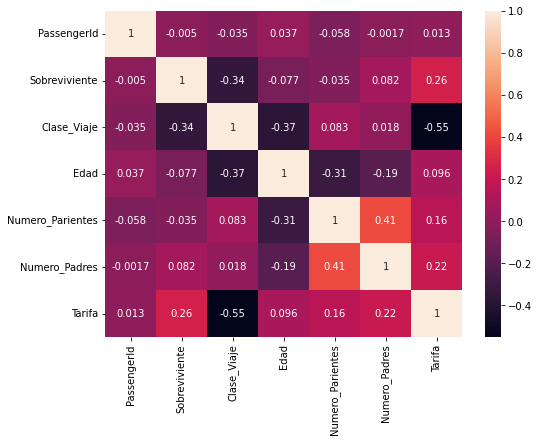

In [ ]:
# Correlación de Pearson
corr_df = datos.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

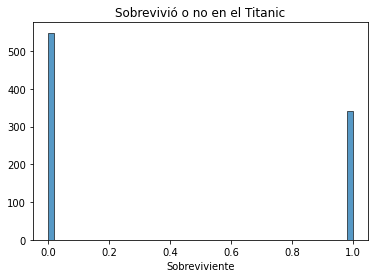

In [ ]:
#histogramas supervivencia
sns.histplot(data = datos , x ='Sobreviviente', bins =50)
plt.title('Sobrevivió o no en el Titanic')
plt.xlabel('Sobreviviente')
plt.ylabel('')
plt.show()

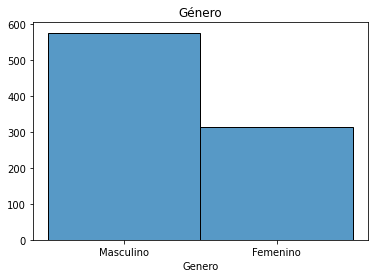

In [ ]:
#histogramas supervivencia
sns.histplot(data = datos , x ='Genero', bins =50)
plt.title('Género')
plt.xlabel('Genero')
plt.ylabel('')
plt.show()

In [ ]:
#Agrupación para únicamente para los que no sobrevivieron
g = datos.groupby(by= datos['Sobreviviente'])
df2 = g.apply(lambda x: x[x['Sobreviviente'] == 0])
df2= pd.DataFrame(df2)
df2.head(3)

PassengerId  Sobreviviente  ...  Cabin Ciudad_Embarque
Sobreviviente                                ...                       
0             0            1              0  ...    NaN    Southhampton
              4            5              0  ...    NaN    Southhampton
              5            6              0  ...    NaN      Queenstown

[3 rows x 11 columns]

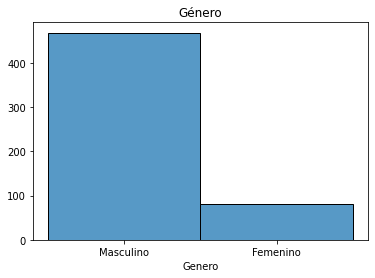

In [ ]:
#Fallecimientos por Género
sns.histplot(data = df2 , x ='Genero', bins =50)
plt.title('Género')
plt.xlabel('Genero')
plt.ylabel('')
plt.show()

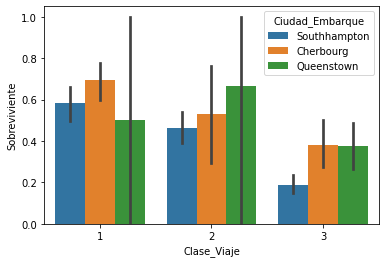

In [ ]:
#Gráfica de barras para sobrevivientes y clases de viaje
sns.barplot(x = "Clase_Viaje", y = "Sobreviviente", hue = "Ciudad_Embarque", data = datos)
plt.show()

In [ ]:
datos["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
E101           3
              ..
B101           1
B50            1
D28            1
D47            1
C106           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
datos["Clase_Viaje"].value_counts()

3    491
1    216
2    184
Name: Clase_Viaje, dtype: int64

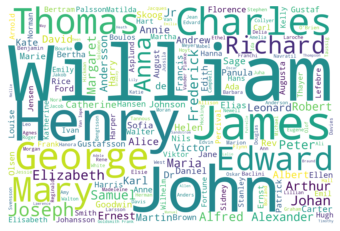

In [ ]:
#Nombres más comunes en el accidente 
#Stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Miss", "Mrs", 'Mr','Master'])

# Word cloud image

text = ' '.join(datos['Nombre'].astype('str'))
wordcloud = WordCloud(width = 1500, height = 1000, stopwords=stopwords, max_font_size=400, max_words=200, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

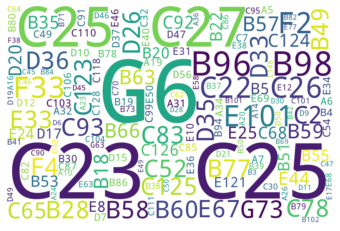

In [ ]:
#Cabinas más mencionadas en el accidente 
#Stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["nan"])

# Word cloud image

text = ' '.join(datos['Cabin'].astype('str'))
wordcloud = WordCloud(width = 1500, height = 1000, stopwords=stopwords, max_font_size=400, max_words=200, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#Eliminar datos no cuantificables del modelo
datos1 =datos.drop(columns=['Nombre','Ciudad_Embarque','Cabin','PassengerId'])

In [ ]:
datos1.head()

,Sobreviviente,Clase_Viaje,Genero,Edad,Numero_Parientes,Numero_Padres,Tarifa
0,0,3,Masculino,22.0,1,0,7.2500
1,1,1,Femenino,38.0,1,0,71.2833
2,1,3,Femenino,26.0,0,0,7.9250
3,1,1,Femenino,35.0,1,0,53.1000
4,0,3,Masculino,35.0,0,0,8.0500


In [ ]:
#Transformación de variable genero para binario
datos1.Genero.replace({'Masculino': 0,'Femenino':1},inplace=True)

In [ ]:
datos1.head()

,Sobreviviente,Clase_Viaje,Genero,Edad,Numero_Parientes,Numero_Padres,Tarifa
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [ ]:
datos1.dtypes

Sobreviviente         int64
Clase_Viaje           int64
Genero                int64
Edad                float64
Numero_Parientes      int64
Numero_Padres         int64
Tarifa              float64
dtype: object

In [ ]:
#Contabilizar nulos
datos1.isna().sum() 

Sobreviviente         0
Clase_Viaje           0
Genero                0
Edad                177
Numero_Parientes      0
Numero_Padres         0
Tarifa                0
dtype: int64

In [ ]:
#Eliminando NANs
datos2 = datos1[datos1['Edad'].notna()]
datos2.isna().sum() 

Sobreviviente       0
Clase_Viaje         0
Genero              0
Edad                0
Numero_Parientes    0
Numero_Padres       0
Tarifa              0
dtype: int64

In [ ]:
X=datos2.drop(columns='Sobreviviente')
y=datos2[['Sobreviviente']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
print(X.shape)
print(y.shape)

(714, 6)
(714, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .2, 
                                                    random_state=42) # obtener valores de test y train 

In [ ]:
acc1 = []
k1 = []
for i in range(1,100):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)

  # Calcular predicciones
  y_pred=knn.predict(X_test)
  y_pred
  # Determinar la precisión del modelo
  precision=accuracy_score(y_test,y_pred)
  acc1.append(precision*100)
  k1.append(i)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [ ]:
df = pd.DataFrame()
df['k'] = k1
df['accuracy'] = acc1
df.head(10)

,k,accuracy
0,1,65.734266
1,2,67.832168
2,3,65.034965
3,4,67.832168
4,5,65.034965
5,6,67.832168
6,7,69.230769
7,8,67.832168
8,9,69.930070
9,10,67.832168


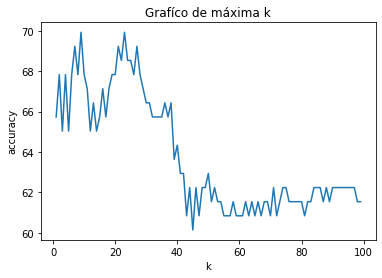

In [ ]:
sns.lineplot(data = df,x= df.k,y=df.accuracy)
plt.title('Grafíco de máxima k')
plt.show()

In [ ]:
print(f'La precisión del modelo es del: {np.round(df.accuracy.max(),2 )}%' + ' para un  k = 9')  

La precisión del modelo es del: 69.93% para un  k = 9


In [ ]:
#Datos convertidos en variables dummies, mejorando el modelo 
datos3= pd.get_dummies(datos2, columns=['Clase_Viaje','Genero'])
datos3.head()

,Sobreviviente,Edad,Numero_Parientes,Numero_Padres,Tarifa,Clase_Viaje_1,Clase_Viaje_2,Clase_Viaje_3,Genero_0,Genero_1
0,0,22.0,1,0,7.2500,0,0,1,1,0
1,1,38.0,1,0,71.2833,1,0,0,0,1
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,1,0


In [ ]:
X=datos3.drop(columns='Sobreviviente')
y=datos3[['Sobreviviente']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
acc2 = []
k2 = []
for i in range(1,100):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)

  # Calcular predicciones
  y_pred=knn.predict(X_test)
  y_pred
  # Determinar la precisión del modelo
  precision=accuracy_score(y_test,y_pred)
  acc2.append(precision*100)
  k2.append(i)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [ ]:
df2 = pd.DataFrame()
df2['k'] = k2
df2['accuracy'] = acc2
df2.head(25)

,k,accuracy
0,1,70.629371
1,2,74.825175
2,3,71.328671
3,4,69.230769
4,5,69.930070
5,6,69.930070
6,7,71.328671
7,8,70.629371
8,9,72.027972
9,10,73.426573


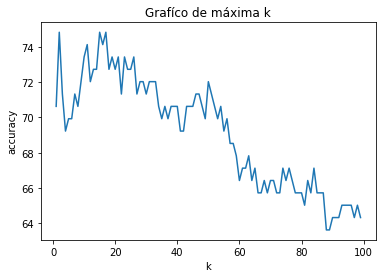

In [ ]:
sns.lineplot(data = df2,x= df2.k,y=df2.accuracy)
plt.title('Grafíco de máxima k')
plt.show()

In [ ]:
print(f'La precisión del modelo es del: {np.round(df2.accuracy.max(),2 )}%' + ' para  k= 2 , k= 15 y k=  17')  

La precisión del modelo es del: 74.83% para un  k= 2 , k= 15 y k=  17
